# Tatanic Survials training
1. Define the question
2. preview the data
    * data shape
    * data head and tail
    * data info
3. data cleaning and features engineering
    * data cleaning
        * NA and missing check
        * data type check
    * data engineering
        * normalize
        * standardize
    
3. hypothesis and model setup
    * hypothesis
        * state hypothesis
        * setup hpyothesis testing criteria
    * model setup
4. model training and parameter tunnig
    * model training
    * fine tune parameter
5. data visualization and analysis


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR, SVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



In [3]:
df = pd.DataFrame(pd.read_csv('../Data/titanic/train.csv'))


In [4]:
df.shape
df.head(10)
df.tail(10)
df.info()
df.describe()

(891, 12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data cleaning Feature Engineering 
| Variable | definition | key |
| :--- | :--- | :--- |
| 'PassengerId'| a unique id for identifing the passenger  | 
|'survival'| Survival or not |0 = No, 1 = Yes|
|'Pclass'| Ticket class| 1 = 1st, 2 = 2nd, 3 = 3rd|
|'Name'|
|'Sex'|
|'Age'|
|'SibSp'|# of siblings / spouses aboard the Titanic
|'Parch'|# of parents / children aboard the Titanic
|'Ticket'|Ticket number
|'Fare'|Passenger fare
|'Cabin'|Cabin number
|'Embarked'|	Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton


In [5]:
# we will check the correlation of survival and other features
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


,Sex,Survived
0,female,0.742038
1,male,0.188908


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [6]:
# we will check if NA and None exist in the dataframe
df.isnull().sum()

df.isnull().sum()/len(df)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [7]:
df.loc[df['Cabin'].notnull()].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


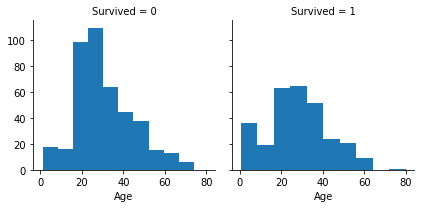

In [8]:
grid = sns.FacetGrid(df, col='Survived')
grid.map(plt.pyplot.hist, 'Age', bins=10)

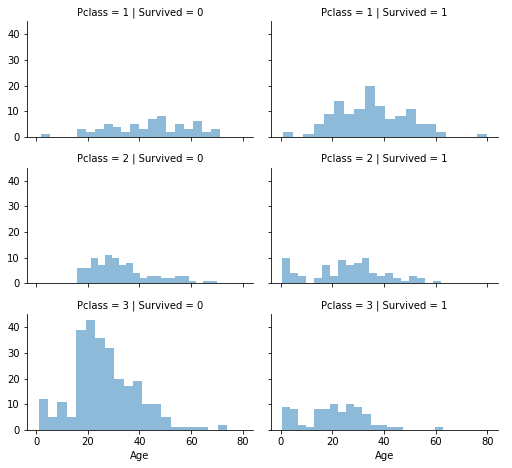

In [9]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.pyplot.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


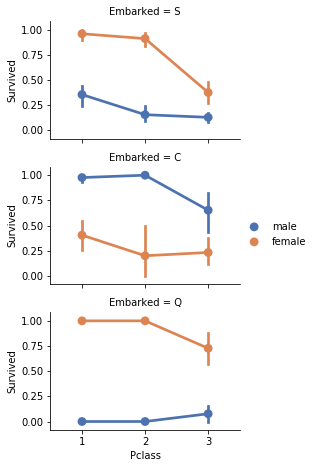

In [10]:
grid = sns.FacetGrid(df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


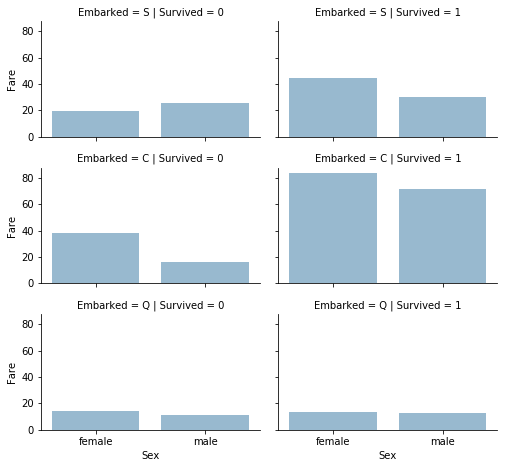

In [11]:
grid = sns.FacetGrid(df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [12]:
df['Sex'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
guess_df = df.loc[df['Sex']==1]
guess_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",1,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",1,39.0,1,5,347082,31.2750,NaN,S
16,17,0,3,"Rice, Master. Eugene",1,2.0,4,1,382652,29.1250,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",1,NaN,0,0,244373,13.0000,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",1,35.0,0,0,239865,26.0000,NaN,S


In [13]:
guess_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        guess_df = df[(df['Sex'] == i) & (df['Pclass'] == j+1)]['Age'].dropna()

        age_guess = guess_df.median()

        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
for i in range(0, 2):
    for j in range(0, 3):
        df.loc[ (df['Age'].isnull()) & (df['Sex'] == i) & (df['Pclass'] == j+1),'Age'] = guess_ages[i,j]

df['Age'] = df['Age'].astype(int)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,25,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14,1,0,237736,30.0708,NaN,C


In [14]:
df = pd.get_dummies(df,columns=['Sex','Embarked'])
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,NaN,0,1,0,0,1
5,6,0,3,"Moran, Mr. James",25,0,0,330877,8.4583,NaN,0,1,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",54,0,0,17463,51.8625,E46,0,1,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2,3,1,349909,21.0750,NaN,0,1,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27,0,2,347742,11.1333,NaN,1,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14,1,0,237736,30.0708,NaN,1,0,1,0,0


In [15]:
df_x = df.drop(columns=['PassengerId','Sex_1','Survived','Name','Ticket','Cabin','Embarked_C'])
X_train,X_test,Y_train,Y_test = train_test_split(df_x,df['Survived'], random_state=999)

In [16]:
model_logreg = LinearRegression().fit(X_train,Y_train)
Y_pred = model_logreg.predict(X_test)
acc_log = round(model_logreg.score(X_train, Y_train) * 100, 2)
acc_log

42.02

In [17]:
model_svm = SVC().fit(X_train,Y_train)
Y_pred = model_svm.predict(X_test)
acc_svc = round(model_svm.score(X_train, Y_train) * 100, 2)
acc_svc

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


89.67

In [18]:
model_perc = Perceptron().fit(X_train,Y_train)
Y_pred = model_perc.predict(X_test)
acc_perc = round(model_perc.score(X_train, Y_train) * 100, 2)
acc_perc

D:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


69.76

In [19]:
model_sgd = SGDClassifier().fit(X_train, Y_train)
Y_pred = model_sgd.predict(X_test)
acc_sgd = round(model_sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

D:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


66.17

In [20]:
model_tree = DecisionTreeClassifier().fit(X_train, Y_train)
Y_pred = model_tree.predict(X_test)
acc_tree = round(model_tree.score(X_train, Y_train) * 100, 2)
acc_tree

98.8

In [21]:
model_Forest = RandomForestClassifier(n_estimators=100).fit(X_train, Y_train)
Y_pred = model_Forest.predict(X_test)
acc_forest = round(model_Forest.score(X_train, Y_train) * 100, 2)
acc_forest

98.8

In [22]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_svc, acc_log, 
              acc_forest, acc_perc, 
              acc_sgd,acc_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,98.80
5,Decision Tree,98.80
0,Support Vector Machines,89.67
3,Perceptron,69.76
4,Stochastic Gradient Decent,66.17
1,Logistic Regression,42.02
